Dataset D1:
Degree | E_in  | E_out
  1    | 0.0003 | 0.0020
  2    | 0.0003 | 0.0018
  3    | 0.0002 | 0.0016
  4    | 0.0002 | 0.0014
  5    | 0.0001 | 0.0023
  6    | 0.0000 | 0.0048
  7    | 0.0000 | 0.0046
  8    | 0.0000 | 0.0873
  9    | 0.0000 | 0.2435


Dataset D2:
Degree | E_in  | E_out
  1    | 0.0009 | 0.0005
  2    | 0.0006 | 0.0003
  3    | 0.0004 | 0.0004
  4    | 0.0004 | 0.0004
  5    | 0.0002 | 0.0017
  6    | 0.0002 | 0.0009
  7    | 0.0002 | 0.0036
  8    | 0.0001 | 0.9537
  9    | 0.0000 | 5558.9193


Dataset D3:
Degree | E_in  | E_out
  1    | 0.0014 | 0.0026
  2    | 0.0009 | 0.0013
  3    | 0.0007 | 0.0023
  4    | 0.0006 | 0.0041
  5    | 0.0005 | 0.0121
  6    | 0.0003 | 0.4499
  7    | 0.0003 | 0.3999
  8    | 0.0001 | 212.1232
  9    | 0.0000 | 9378.4391




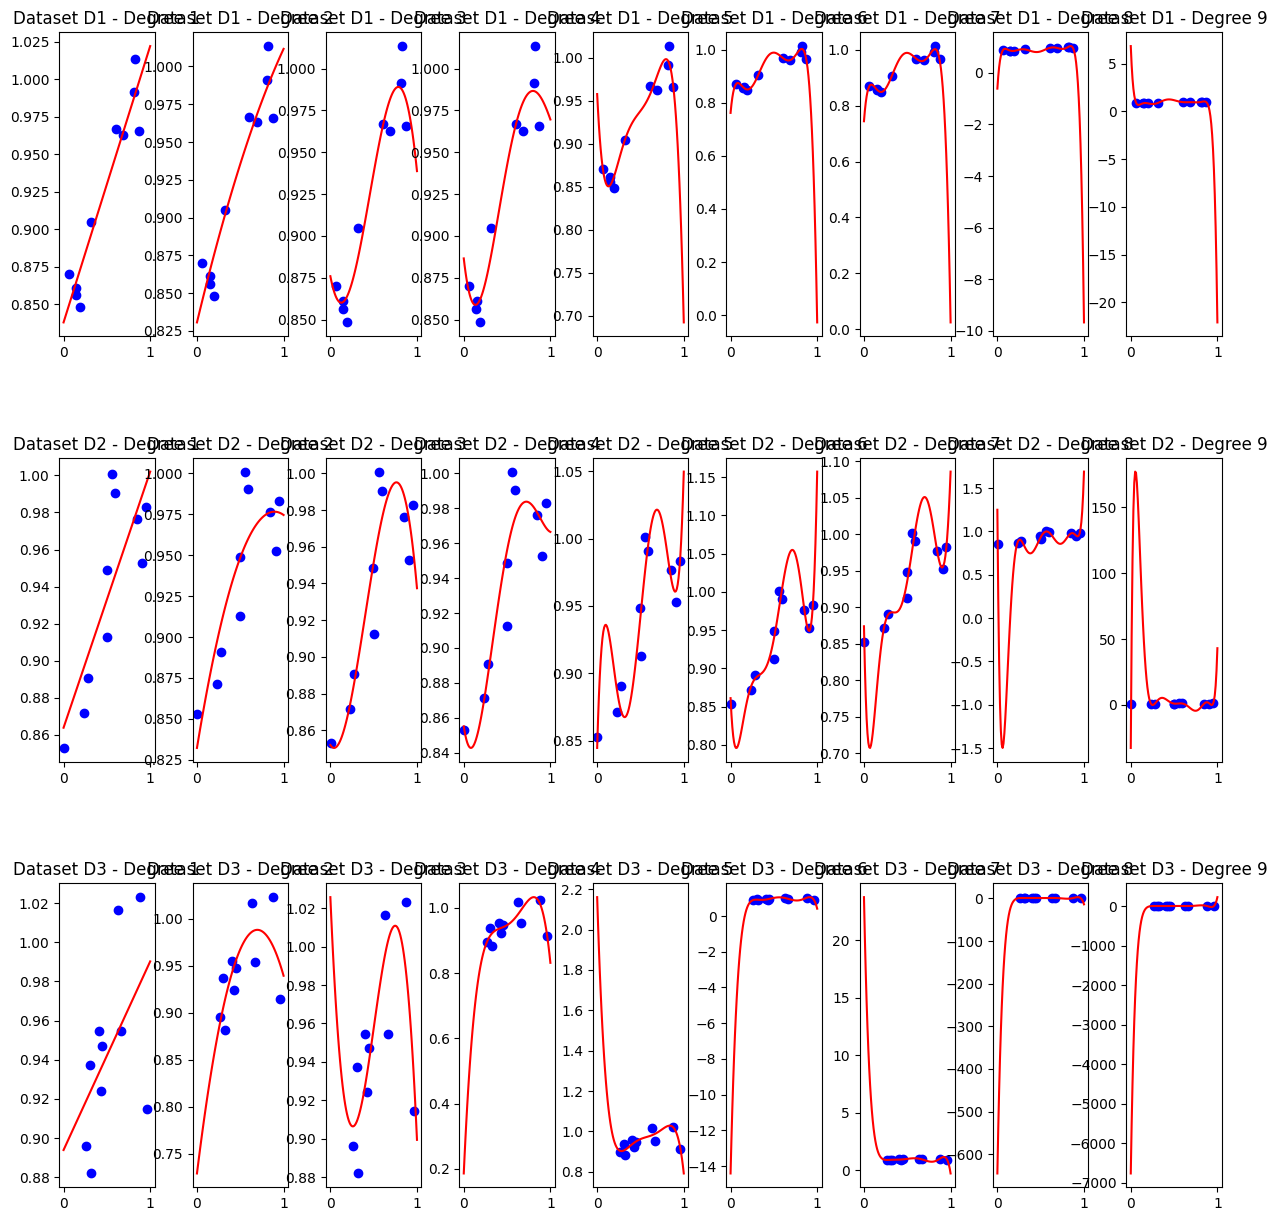

Dataset D1 (size 100):
Degree | E_in  | E_out
  1    | 0.0011 | 0.0017
  2    | 0.0010 | 0.0012
  3    | 0.0007 | 0.0011
  4    | 0.0007 | 0.0010
  5    | 0.0007 | 0.0011
  6    | 0.0007 | 0.0011
  7    | 0.0007 | 0.0011
  8    | 0.0007 | 0.0012
  9    | 0.0007 | 0.0012


Dataset D2 (size 100):
Degree | E_in  | E_out
  1    | 0.0015 | 0.0021
  2    | 0.0013 | 0.0016
  3    | 0.0010 | 0.0010
  4    | 0.0010 | 0.0010
  5    | 0.0010 | 0.0011
  6    | 0.0010 | 0.0011
  7    | 0.0010 | 0.0011
  8    | 0.0010 | 0.0011
  9    | 0.0010 | 0.0011


Dataset D3 (size 100):
Degree | E_in  | E_out
  1    | 0.0015 | 0.0018
  2    | 0.0013 | 0.0015
  3    | 0.0010 | 0.0009
  4    | 0.0010 | 0.0008
  5    | 0.0010 | 0.0008
  6    | 0.0010 | 0.0009
  7    | 0.0010 | 0.0008
  8    | 0.0010 | 0.0008
  9    | 0.0010 | 0.0008


Dataset D1 (size 1000):
Degree | E_in  | E_out
  1    | 0.0016 | 0.0016
  2    | 0.0012 | 0.0012
  3    | 0.0009 | 0.0009
  4    | 0.0009 | 0.0009
  5    | 0.0009 | 0.0009
  6    | 

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Thiết lập seed
seed = 230101074  # Thay đổi thành mã số học viên cao học của bạn
np.random.seed(seed)
random.seed(seed)

# Hàm tạo dữ liệu
def generate_data(n):
    x = np.random.rand(n, 1)
    noise = np.random.normal(0, 0.03, x.shape)
    y = np.sin(1 + x**2) + noise
    return x, y

# Hàm huấn luyện và tính toán lỗi
def evaluate_models(train_x, train_y, test_x, test_y, max_degree=9):
    E_in = []
    E_out = []
    for degree in range(1, max_degree + 1):
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(train_x)
        X_poly_test = poly.transform(test_x)

        model = LinearRegression()
        model.fit(X_poly_train, train_y)

        y_train_pred = model.predict(X_poly_train)
        y_test_pred = model.predict(X_poly_test)

        E_in.append(mean_squared_error(train_y, y_train_pred))
        E_out.append(mean_squared_error(test_y, y_test_pred))

    return E_in, E_out

# Tạo 03 bộ dữ liệu và đánh giá các mô hình
datasets = {}
results = {}
for i in range(1, 4):
    train_x, train_y = generate_data(10)
    test_x, test_y = generate_data(10)
    datasets[f'D{i}'] = {'train': (train_x, train_y), 'test': (test_x, test_y)}
    E_in, E_out = evaluate_models(train_x, train_y, test_x, test_y)
    results[f'D{i}'] = {'E_in': E_in, 'E_out': E_out}

# In bảng kết quả
for key in results:
    print(f"Dataset {key}:")
    print("Degree | E_in  | E_out")
    for degree in range(1, 10):
        print(f"  {degree}    | {results[key]['E_in'][degree-1]:.4f} | {results[key]['E_out'][degree-1]:.4f}")
    print("\n")

# Trực quan hóa kết quả
fig, axs = plt.subplots(3, 9, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, (dataset_key, dataset) in enumerate(datasets.items()):
    train_x, train_y = dataset['train']
    for degree in range(1, 10):
        poly = PolynomialFeatures(degree)
        X_poly_train = poly.fit_transform(train_x)

        model = LinearRegression()
        model.fit(X_poly_train, train_y)

        x_fit = np.linspace(0, 1, 100).reshape(-1, 1)
        y_fit = model.predict(poly.transform(x_fit))

        ax = axs[i, degree-1]
        ax.scatter(train_x, train_y, color='blue')
        ax.plot(x_fit, y_fit, color='red')
        ax.set_title(f'Dataset {dataset_key} - Degree {degree}')
plt.show()

# Thực hiện tương tự với kích thước tập train và test là 100 và 1000
sizes = [100, 1000]
for size in sizes:
    datasets = {}
    results = {}
    for i in range(1, 4):
        train_x, train_y = generate_data(size)
        test_x, test_y = generate_data(size)
        datasets[f'D{i}'] = {'train': (train_x, train_y), 'test': (test_x, test_y)}
        E_in, E_out = evaluate_models(train_x, train_y, test_x, test_y)
        results[f'D{i}'] = {'E_in': E_in, 'E_out': E_out}

    # In bảng kết quả
    for key in results:
        print(f"Dataset {key} (size {size}):")
        print("Degree | E_in  | E_out")
        for degree in range(1, 10):
            print(f"  {degree}    | {results[key]['E_in'][degree-1]:.4f} | {results[key]['E_out'][degree-1]:.4f}")
        print("\n")


Nhận xét
1. Tăng kích thước tập train có thể giảm bias của mô hình hay không?
Bias của mô hình thường được phản ánh qua lỗi trên tập huấn luyện (E_in). Bias cao thường xảy ra khi mô hình quá đơn giản so với dữ liệu, không thể nắm bắt được các mẫu trong dữ liệu, dẫn đến lỗi huấn luyện cao.

Khi tăng kích thước tập huấn luyện, mô hình sẽ có nhiều dữ liệu hơn để học hỏi, điều này có thể giúp mô hình hiểu rõ hơn về quan hệ giữa các biến đầu vào và đầu ra, do đó giảm bias.

Kết quả quan sát:

Khi tăng kích thước tập huấn luyện từ 10 lên 100 và sau đó lên 1000, ta thường thấy E_in giảm đi, đặc biệt là đối với các mô hình có độ phức tạp cao hơn (degree lớn hơn). Điều này chứng tỏ rằng mô hình có khả năng học tốt hơn khi có nhiều dữ liệu hơn, giảm bias của mô hình.

2. Tăng kích thước tập train có thể giảm variance của mô hình hay không?
Variance của mô hình thường được phản ánh qua sự khác biệt giữa lỗi trên tập huấn luyện (E_in) và lỗi trên tập kiểm tra (E_out). Variance cao thường xảy ra khi mô hình quá phức tạp, nắm bắt quá nhiều chi tiết của tập huấn luyện, nhưng lại không thể tổng quát hóa tốt trên dữ liệu mới, dẫn đến lỗi kiểm tra cao.

Khi tăng kích thước tập huấn luyện, mô hình sẽ có khả năng học được một cách tổng quát hơn, ít bị ảnh hưởng bởi các nhiễu loạn trong dữ liệu huấn luyện, do đó giảm variance.

Kết quả quan sát:

Khi tăng kích thước tập huấn luyện từ 10 lên 100 và sau đó lên 1000, ta thường thấy khoảng cách giữa E_in và E_out giảm đi. Điều này chứng tỏ rằng mô hình không chỉ học tốt hơn trên dữ liệu huấn luyện mà còn tổng quát hóa tốt hơn trên dữ liệu kiểm tra, giảm variance của mô hình.